In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x1 = pd.read_csv('X1.csv', sep=',', header=None).values
x2 = pd.read_csv('X2.csv', sep=',', header=None).values
t1 = pd.read_csv('T1.csv', sep=',', header=None).values
t2 = pd.read_csv('T2.csv', sep=',', header=None).values
t3 = pd.read_csv('T3.csv', sep=',', header=None).values
t4 = pd.read_csv('T4.csv', sep=',', header=None).values
t5 = pd.read_csv('T5.csv', sep=',', header=None).values

In [3]:
t_new = 6 * t1 + 5 * t2 + 5 * t3 + 3 * t4 + 1 * t5

In [4]:
t_new

array([[ 54.4259  ],
       [ 72.7657  ],
       [ 77.8384  ],
       ..., 
       [ 52.12907 ],
       [ 65.1116  ],
       [ 61.795605]])

In [5]:
x = np.concatenate((x1,x2), axis=1)

In [6]:
len(t_new)

13600

In [7]:
def select_data(x,t_new,start,stop):
    """
    randomly selects 1000 samples from x and t
    :param x: 
    :param t_new: 
    :return: 
    """
    data = np.concatenate((x,t_new), axis=1)
    random.shuffle(data)
    return data[start:stop,0:2], data[start:stop,2]
    

x_train_and_validate,t_train_and_validate = select_data(x,t_new,0,2000)
x_test, t_test = select_data(x,t_new,2000,3000)

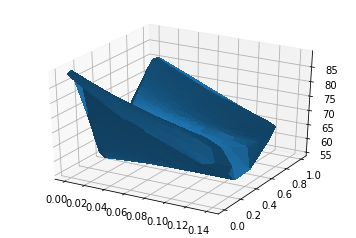

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_train_and_validate[:,0],x_train_and_validate[:,1], t_train_and_validate,
                       linewidth=0, antialiased=False)
plt.savefig('surface.png')
plt.show()

In [9]:
mlp = MLPRegressor(verbose=0, random_state=0, max_iter=10000, early_stopping=True, validation_fraction=0.5)
mlp.fit(x_train_and_validate, t_train_and_validate)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.5, verbose=0,
       warm_start=False)

In [10]:
prediction = mlp.predict(x_test)

In [11]:
MSE = mean_squared_error(t_test, prediction)

In [12]:
MSE

12.210807619971936

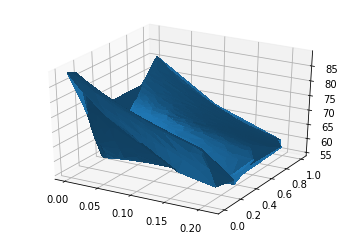

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_test[:,0],x_test[:,1], t_test,
                       linewidth=0, antialiased=False)
plt.savefig('surface_test.png')
plt.show()

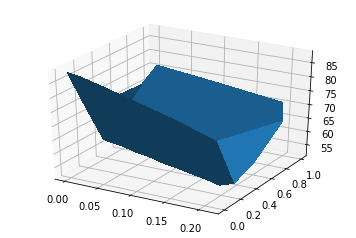

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_test[:,0],x_test[:,1], prediction,
                       linewidth=0, antialiased=False)
plt.savefig('surface_prediction.png')
plt.show()

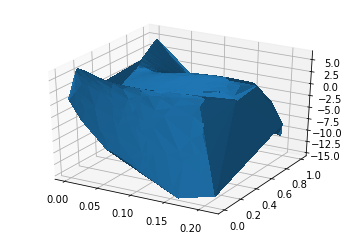

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_test[:,0],x_test[:,1], t_test - prediction,
                       linewidth=0, antialiased=False)
plt.savefig('errors.png')
plt.show()

In [17]:
prediction_training = mlp.predict(x_train_and_validate)
MSE2 = mean_squared_error(t_train_and_validate, prediction_training)

In [18]:
MSE

12.210807619971936

In [19]:
(MSE - MSE2) / MSE

0.44934015136998767

In [20]:
features = np.concatenate((x_train_and_validate, x_test), axis=0)
target = np.concatenate((t_train_and_validate, t_test), axis=0)

In [21]:
layer_sizes = []
for x in range(1, 4):
    for y in range(70, 151, 20):
        layer_sizes.append((y, x))

In [22]:
mlp = MLPRegressor(verbose=0, random_state=0, max_iter=10000)

In [27]:
parameters = [{'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
              'early_stopping': [True, False], 'hidden_layer_sizes': layer_sizes}]
clf = GridSearchCV(mlp, parameters, scoring='neg_mean_squared_error')

In [28]:
clf.fit(features, target)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'early_stopping': [True, False], 'hidden_layer_sizes': [(70, 1), (90, 1), (110, 1), (130, 1), (150, 1), (70, 2), (90, 2), (110, 2), (130, 2), (150, 2), (70, 3), (90, 3), (110, 3), (130, 3), (150, 3)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [29]:
print(clf.best_params_)

{'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (150, 2), 'solver': 'lbfgs'}


In [30]:
mlp = MLPRegressor(verbose=0, random_state=0, max_iter=10000,activation='relu', early_stopping=True, hidden_layer_sizes=(150,2), solver='lbfgs')

In [31]:
mlp.fit(x_train_and_validate, t_train_and_validate)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(150, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [33]:
prediction = mlp.predict(x_test)

In [33]:
MSE = mean_squared_error(t_test, prediction)
MSE

0.45533385341281662

In [34]:
prediction_training = mlp.predict(x_train_and_validate)
MSE2 = mean_squared_error(t_train_and_validate, prediction_training)

In [35]:
(MSE - MSE2) / MSE

0.90674847885043142

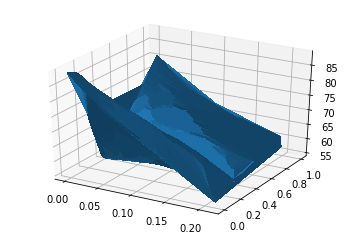

In [37]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_test[:,0],x_test[:,1], prediction,
                       linewidth=0, antialiased=False)
plt.savefig('surface_prediction_better.png')
plt.show()

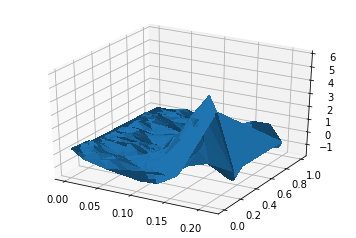

In [38]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_test[:,0],x_test[:,1], t_test - prediction,
                       linewidth=0, antialiased=False)
plt.savefig('errors_better.png')
plt.show()

In [39]:
layer_sizes = []
for x in range(1, 4):
    for y in range(130, 250, 10):
        layer_sizes.append((y, x))

In [40]:
# further optmizing architecture
parameters = [{'hidden_layer_sizes': layer_sizes}]
clf = GridSearchCV(mlp, parameters, scoring='neg_mean_squared_error')

In [41]:
mlp.fit(x_train_and_validate, t_train_and_validate)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(150, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [47]:
clf.fit(features, target)
print(clf.best_params_)

{'hidden_layer_sizes': (230, 3)}


In [51]:
mlp = MLPRegressor(verbose=0, random_state=0, max_iter=10000,activation='relu', early_stopping=True, hidden_layer_sizes=(230,3), solver='lbfgs')
mlp2 = MLPRegressor(verbose=0, random_state=0, max_iter=10000,activation='relu', early_stopping=True, hidden_layer_sizes=(230,3), solver='lbfgs')
mlp.fit(x_train_and_validate, t_train_and_validate)
mlp2.fit(x_train_and_validate, t_train_and_validate)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(230, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [52]:
prediction = mlp.predict(x_test)
MSE = mean_squared_error(t_test, prediction)

prediction_training = mlp2.predict(x_train_and_validate)
MSE2 = mean_squared_error(t_train_and_validate, prediction_training)

In [53]:
MSE

0.2809152468027511

In [54]:
MSE2

0.037989824245741502

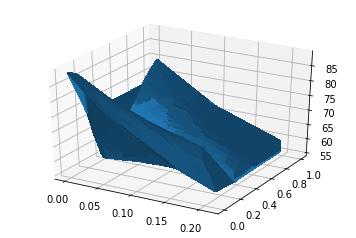

In [57]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_test[:,0],x_test[:,1], prediction,
                       linewidth=0, antialiased=False)
plt.savefig('surface_prediction_better.png')
plt.show()

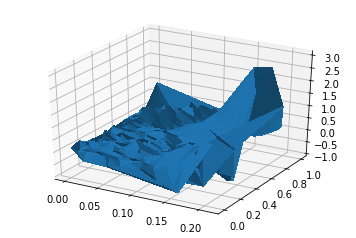

In [58]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_test[:,0],x_test[:,1], t_test - prediction,
                       linewidth=0, antialiased=False)
plt.savefig('errors_better.png')
plt.show()